In [72]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
from shapely.geometry import Point, LineString, MultiLineString


In [73]:
gdf = gpd.read_file("../geojson/hanoi_metro/hanoi_metro_lines.geojson", crs="EPSG:3857")
gdf = gdf.to_crs("epsg:4326")
gdf['globeid'] = gdf['GlobalID']
gdf['GlobalID'] = gdf['TITLE']
gdf['TITLE'] = gdf["TITLE"].str.replace("'", "")
df = gdf.groupby('TITLE').agg({
    'OBJECTID': 'first',
    'VISIBLE': 'first',
    'DESCRIPTION': 'first',
    'IMAGE_URL': 'first',
    'IMAGE_LINK_URL': 'first',
    'DATE': 'first',
    'TYPEID': 'first',
    'GlobalID': 'first',
    'geometry': lambda x: x.union_all(),
    'globeid': 'first'
}).reset_index()
#df.head(20)
gdf = gpd.GeoDataFrame(df, crs="epsg:4326")

def multiline_to_single_line(geometry) -> LineString:
  if isinstance(geometry, LineString):
      return geometry
  coords = list(map(lambda part: list(part.coords), geometry.geoms))
  flat_coords = [Point(*point) for segment in coords for point in segment]
  return LineString(flat_coords)

gdf.loc[3, 'geometry'] =  multiline_to_single_line(gdf.loc[3, 'geometry'])
try:
    os.remove("../geojson/hanoi_metro/hanoi_metro_lines_c.geojson")
    gdf.to_file("../geojson/hanoi_metro/hanoi_metro_lines_c.geojson")
except OSError:
    gdf.to_file("../geojson/hanoi_metro/hanoi_metro_lines_c.geojson")
gdf.head(20)

/Users/minhnguyen/miniconda3/envs/manim2023/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GeoJSON does not support open option CRS
  return ogr_read(


,TITLE,OBJECTID,VISIBLE,DESCRIPTION,IMAGE_URL,IMAGE_LINK_URL,DATE,TYPEID,GlobalID,geometry,globeid
0,2A Line,1,1,None,None,None,None,0,2A Line,"LINESTRING (105.8273 21.029, 105.82746 21.0269...",a892b0d9-5442-4058-a88b-b55f5e565457
1,Line 1,2,1,None,None,None,None,0,Line 1,"MULTILINESTRING ((105.93085 21.10069, 105.9157...",9290dd14-1cc9-4223-9225-313245545983
2,Line 2,4,1,None,None,None,None,0,Line 2,"MULTILINESTRING ((105.84803 21.25658, 105.8420...",aa39c8c8-414b-4db9-ac43-48aa2103d153
3,Line 3,6,1,None,None,None,None,0,Line 3,"LINESTRING (105.68899 21.07967, 105.69508 21.0...",d70e92a9-42ff-46ca-9e90-6db6242f82da
4,Line 3 future,13,1,None,None,None,None,0,Line 3 future,"MULTILINESTRING ((105.84642 21.0227, 105.85895...",a9882613-90be-4e4e-8f0c-21bcee9b280f
5,Line 3-uc,24,1,None,None,None,None,0,Line 3-uc,"MULTILINESTRING ((105.68899 21.07967, 105.6950...",c4a0b80c-ec0d-4abb-a6fc-f66c5e9ee472
6,Line 4,16,1,None,None,None,None,0,Line 4,"LINESTRING (105.70574 21.09537, 105.71278 21.0...",5dcee158-1595-4578-a81d-52fee85f741e
7,Line 5,17,1,None,None,None,None,0,Line 5,"MULTILINESTRING ((105.81682 21.04283, 105.8125...",8d34be2d-84eb-4b6e-975c-20245a026872
8,Line 6,19,1,None,None,None,None,0,Line 6,"MULTILINESTRING ((105.80075 21.2145, 105.78213...",101d9ae6-7d0a-49c0-9458-8d3dba29731d
9,Line 7,21,1,None,None,None,None,0,Line 7,"LINESTRING (105.75923 21.16905, 105.76094 21.1...",8f987cec-8c94-4e4f-8798-f7859d007485


<Axes: >

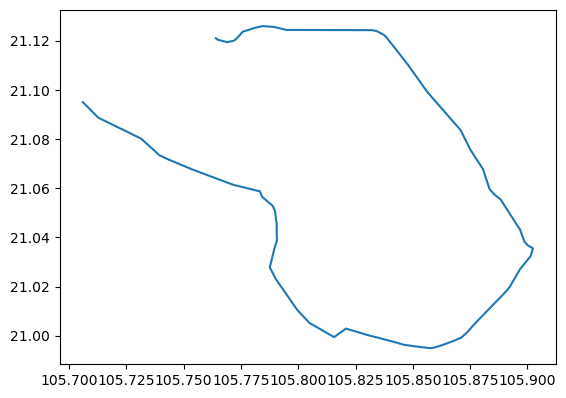

In [74]:
gdf[gdf['TITLE']=='Line 4'].plot()

/Users/minhnguyen/miniconda3/envs/manim2023/lib/python3.10/site-packages/pyogrio/raw.py:196: RuntimeWarning: driver GeoJSON does not support open option CRS
  return ogr_read(


<Axes: >

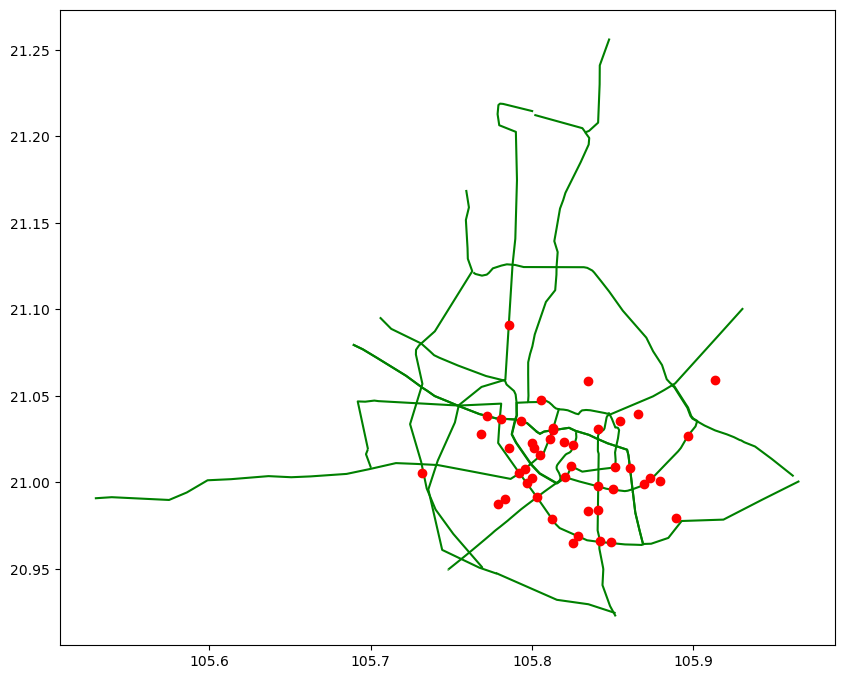

In [75]:
congest = gpd.read_file("../misc/Hanoi_Jamspot.json", crs='epsg:4326')
congest.to_file("../geojson/hanoi_metro/congestion_points.geojson")
fig, ax = plt.subplots(figsize=(10, 10))
congest.plot(ax=ax, color="red", zorder=1)
gdf.plot(ax=ax, color='green', zorder=0)

In [76]:
congest.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      45 non-null     object  
 1   name      1 non-null      object  
 2   geometry  46 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.2+ KB


In [84]:
with open('./all_stations.json', 'r') as file:
    data = json.load(file)

def flatten_features(features):
    flattened_data = []
    for feature in features:
        flattened_feature = {
            "x": feature["geometry"]["x"],
            "y": feature["geometry"]["y"],
            "spatialReferenceWkid": feature["geometry"]["spatialReference"]["wkid"],
            "order": feature["attributes"]["Order_"],
            "station": feature["attributes"]["Station"],
            "line": feature["attributes"]["Line"],
            "long": feature["attributes"]["Long"],
            "lat": feature["attributes"]["Lat"],
            "objectId": feature["attributes"]["__OBJECTID"]
        }
        flattened_data.append(flattened_feature)
    return flattened_data
flattened_features = flatten_features(data["features"])
bdf = pd.DataFrame(flattened_features).sort_values(by="objectId")

bdf['station'] = bdf['station'].str.replace(r"(?<!.)\bSo\b", "Nga Tu So", regex=True).str.replace("Noi Bai International Airport", "Noi Bai")


bdf = bdf.groupby('station').agg({
    'line': lambda x: ",".join(map(str, x)),
    **{col: 'first' for col in bdf.columns if col not in ['station', 'line']}
}).reset_index()

bdf['geometry'] = bdf.apply(lambda row: Point(row['long'], row['lat']), axis=1)
bdf = gpd.GeoDataFrame(bdf, geometry="geometry", crs="epsg:4326")
bdf.to_file("../geojson/hanoi_metro/hanoi_all_stations.geojson")
bdf.head(20)

,station,line,x,y,spatialReferenceWkid,order,long,lat,objectId,geometry
0,An Khanh,5,1.176973e+07,2.393144e+06,102100,4,105.729318,21.010616,130,POINT (105.72932 21.01062)
1,Bac Thang Long Hai Boi,4,1.178198e+07,2.406220e+06,102100,34,105.839341,21.120229,102,POINT (105.83934 21.12023)
2,Bach Khoa,2,1.178236e+07,2.392797e+06,102100,26,105.842713,21.007706,37,POINT (105.84271 21.00771)
3,Bach Mai,1,1.178218e+07,2.391962e+06,102100,10,105.841132,21.000703,56,POINT (105.84113 21.0007)
4,Bach Thao,2,1.178093e+07,2.396739e+06,102100,20,105.829887,21.040758,31,POINT (105.82989 21.04076)
5,Bat Trang,8,1.179082e+07,2.389322e+06,102100,15,105.918724,20.978557,174,POINT (105.91872 20.97856)
6,BigC Long Bien,1,1.178788e+07,2.397713e+06,102100,16,105.892309,21.048922,62,POINT (105.89231 21.04892)
7,Buoi,2,1.177735e+07,2.397399e+06,102100,18,105.806034,21.047411,29,POINT (105.80603 21.04741)
8,Cat Linh,"2A,3",1.178065e+07,2.395258e+06,102100,1,105.827336,21.028335,0,POINT (105.82734 21.02833)
9,Cau Den,2,1.178335e+07,2.392915e+06,102100,25,105.851602,21.008691,36,POINT (105.8516 21.00869)


In [78]:
bdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   station               153 non-null    object  
 1   line                  153 non-null    object  
 2   x                     153 non-null    float64 
 3   y                     153 non-null    float64 
 4   spatialReferenceWkid  153 non-null    int64   
 5   order                 153 non-null    int64   
 6   long                  153 non-null    float64 
 7   lat                   153 non-null    float64 
 8   objectId              153 non-null    int64   
 9   geometry              153 non-null    geometry
dtypes: float64(4), geometry(1), int64(3), object(2)
memory usage: 12.1+ KB


In [79]:
dfs = [df for _, df in bdf.groupby("line")]
def export_geojson(gdf, path):
    try:
        os.remove(path)
        gdf.to_file(path, driver="geojson")
    except OSError:
        gdf.to_file(path, driver="geojson")
#dfs[0].head()
#for df in dfs:
#    df['geometry'] = df.apply(lambda row: Point(row['long'], row['lat']), axis=1)
#    df['GlobalID'] = df['station']
#   gdf = gpd.GeoDataFrame(df, geometry="geometry", crs='epsg:4326')
#   path = f"../geojson/hanoi_metro/line_{df['line'].iloc[0]}_stations.geojson"
#    #with open(path, 'w') as f:
#    #    json.dump(geojson_data, f, indent=2)
#    export_geojson(gdf, path)